## FEEG1002 - Statics 2
## Strain calculation and interpetation
### Dr. Davis - fmd1f14@soton.ac.uk

In this notebook, we're going to use Python/NumPy/Matplotlib to calculate the strain and rotation matrices from a displacement vector. The notebook is split into two sections. The first section directly computes the strain and rotation while the second section uses the calculated strain and displacement to plot the shape a square box would take after the deformation was applied. 

In [1]:
# Load necessary functions
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Section I: Strain calculation

In <a href = 'https://blackboard.soton.ac.uk/bbcswebdav/courses/FEEG1002-29851-16-17/FEEG1002-S2-2016_Lecture3.pdf'>Lecture 3</a>, the definiations for displacement and strain were introduced.  The displacement is a vector which describes the motion of a each point in the body from the undeformed configuration to the deformed configuration.

$${\bf u} = \begin{bmatrix}u_x\left(x, y, z\right)\\ u_y\left(x, y, z\right) \\ u_z\left(x, y, z\right) \end{bmatrix}$$

The displacement vector is composed of three functions ($u_x$, $u_y$, $u_z$) which can depend on $x$, $y$, and $z$.  As discussed in class, the displacement contains, rigid body translation, rigid body rotation, and deformation.  We use strain as convenient method to isolate the deformation.

The strain matrix was defined as $\epsilon = \frac{1}{2}\left(\overline{\overline{grad}}\,{\bf u} + \overline{\overline{grad}}\,{\bf u}^{\mathrm{T}} \right) $ where

$${\bf \epsilon} = \begin{bmatrix}\epsilon_{xx} & \epsilon_{xy} & \epsilon_{xz}\\
\epsilon_{xy}& \epsilon_{yy} & \epsilon_{yz}\\
\epsilon_{xz} & \epsilon_{yz} & \epsilon_{zz}\end{bmatrix}
= \begin{bmatrix}\frac{\partial u_x}{\partial x} & \frac{1}{2}\left(\frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x} \right) & \frac{1}{2}\left(\frac{\partial u_x}{\partial z} + \frac{\partial u_z}{\partial x} \right)\\
\frac{1}{2}\left(\frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x} \right)& \frac{\partial u_y}{\partial y} & \frac{1}{2}\left(\frac{\partial u_y}{\partial z} + \frac{\partial u_z}{\partial y} \right)\\
\frac{1}{2}\left(\frac{\partial u_x}{\partial z} + \frac{\partial u_z}{\partial x} \right) & \frac{1}{2}\left(\frac{\partial u_y}{\partial z} + \frac{\partial u_z}{\partial y} \right) & \frac{\partial u_z}{\partial z}\end{bmatrix} \,.$$ 

The rotation matrix was defined as $\omega = \frac{1}{2}\left(\overline{\overline{grad}}\,{\bf u} - \overline{\overline{grad}}\,{\bf u}^{\mathrm{T}} \right) $ where

$${\bf \omega} = \begin{bmatrix}\omega_{xx} & \omega_{xy} & \omega_{xz}\\
\omega_{xy}& \omega_{yy} & \omega_{yz}\\
\omega_{xz} & \omega_{yz} & \omega_{zz}\end{bmatrix}
= \begin{bmatrix}0 & \frac{1}{2}\left(\frac{\partial u_x}{\partial y} - \frac{\partial u_y}{\partial x} \right) & \frac{1}{2}\left(\frac{\partial u_x}{\partial z} - \frac{\partial u_z}{\partial x} \right)\\
-\frac{1}{2}\left(\frac{\partial u_x}{\partial y} - \frac{\partial u_y}{\partial x} \right)& 0& \frac{1}{2}\left(\frac{\partial u_y}{\partial z} - \frac{\partial u_z}{\partial y} \right)\\
-\frac{1}{2}\left(\frac{\partial u_x}{\partial z} - \frac{\partial u_z}{\partial x} \right) & -\frac{1}{2}\left(\frac{\partial u_y}{\partial z} - \frac{\partial u_z}{\partial y} \right) & 0\end{bmatrix} \,.$$ 

Recall that the strain matrix describes the deformation while the rotation matrix describes the rigid body rotation.

In [44]:
# Allow the notebook to make symbolic calculations
from IPython.display import display, Math
from sympy import symbols, diff, Matrix, simplify, latex, cos, sin, exp, lambdify
from sympy.interactive import printing
printing.init_printing()

# Make the x, y, and z symbolic
x, y, z = symbols('x y z')

In [20]:
# Write the displacement vector
ux = x*cos(z) + x**2*y**3
uy = x*y**3 + x**2*y**4
uz = 2*x**2*y*sin(3*z**2)

In [21]:
#Calculate the strain
exx = diff(ux, x)
eyy = diff(uy, y)
ezz = diff(uz, z)
exy = 0.5*diff(ux,y) + 0.5*diff(uy,x)
exz = 0.5*diff(ux,z) + 0.5*diff(uz,x)
eyz = 0.5*diff(uy,z) + 0.5*diff(uz,y)
Strain = Matrix([[exx, exy, exz], [exy, eyy, eyz], [exz, eyz, ezz]])
display(Math(latex(r'\varepsilon=') + latex(simplify(Strain))))

<IPython.core.display.Math object>

In [22]:
#Calculate the rotation
wxy = 0.5*diff(ux,y) - 0.5*diff(uy,x)
wxz = 0.5*diff(ux,z) - 0.5*diff(uz,x)
wyz = 0.5*diff(uy,z) - 0.5*diff(uz,y)
Rot = Matrix([[0, wxy, wxz], [-wxy, 0, wyz], [-wxz, -wyz, 0]])
display(Math(latex(r'\omega=') + latex(simplify(Rot))))

<IPython.core.display.Math object>

### Section II: Strain visualization

In this section, we will look at a graphical interpertation of strain.  The setup will mirror the problems from the <a href='https://blackboard.soton.ac.uk/bbcswebdav/courses/FEEG1002-29851-16-17/FEEG1002-S2-2016/S2_Tutorial1.pdf'>first tutorial sheet</a> and the slides from <a href='https://blackboard.soton.ac.uk/bbcswebdav/courses/FEEG1002-29851-16-17/FEEG1002-S2-2016_Lecture4_v1.pdf'>Lecture 4</a>.  The main ideas to keep in mind are that:
* **Normal strains** change distances while keeping angles the same.  $\epsilon_{xx}$, $\epsilon_{yy}$, and $\epsilon_{zz}$ are normal strains.
* **Shear strains** change the angles between two lines while keeping the length of the lines the same.  $\epsilon_{xy}$, $\epsilon_{yz}$, and $\epsilon_{xz}$ are shear strains.

The symbolic variables were actived in the previous section, if you did not run those cells please do so before running the cells below.

In [25]:
ux_plot = 0.1*x + 0.2*y
uy_plot = -0.05*y

In [26]:
#Calculate the strain
exx_plot = diff(ux_plot, x)
eyy_plot = diff(uy_plot, y)
exy_plot = 0.5*diff(ux_plot,y) + 0.5*diff(uy_plot,x)
Strain_plot = Matrix([[exx_plot, exy_plot], [exy_plot, eyy_plot]])
display(Math(latex(r'\varepsilon=') + latex(Strain_plot)))

<IPython.core.display.Math object>

In [27]:
#Calculate the rotation
wxy_plot = 0.5*diff(ux_plot,y) - 0.5*diff(uy_plot,x)
Rot_plot = Matrix([[0, wxy_plot], [-wxy_plot, 0]])
display(Math(latex(r'\omega=') + latex(Rot_plot)))

<IPython.core.display.Math object>

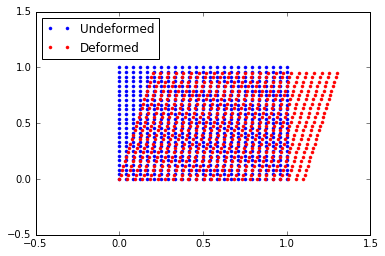

In [51]:
#Plot the square before and after deformation

# Get a list of points in the square
xp = linspace(0, 1, 25)
yp = linspace(0, 1, 25)
xv, yv = meshgrid(xp, yp)
xv = reshape(xv, (625, 1))
yv = reshape(yv, (625, 1))

#Change the displacement from symbolic to numeric
ux_num = lambdify((x, y), ux_plot, "numpy")
uy_num = lambdify((x, y), uy_plot, "numpy")

#Calculate the positions in the deformed configuration
xd = xv + ux_num(xv, yv)
yd = yv + uy_num(xv, yv)

plot(xv, yv, 'b.', label="Undeformed")
plot(xd, yd, 'r.', label="Deformed")
legend(loc=2)
axis([-0.5, 1.5, -0.5, 1.5])